<a href="https://colab.research.google.com/github/Charlesrichie/Codespace-/blob/main/QNN_VQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount("/content/drive")
# Load dataset

subset = pd.read_csv("/content/drive/MyDrive/CIC-ToN-IoT.csv", chunksize=100000)

# Take first chunk for testing
#subset = next(chunk_iter)

#df = pd.read_csv("/content/drive/MyDrive/CIC-ToN-IoT.csv")  # Use a manageable subset


##print(subset.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Take 10,000 random rows (or adjust n or frac)
# subset = df.sample(n=100000, random_state=42)

# Save to new CSV
# subset.to_csv("subset.csv", index=False)

In [3]:
for i, chunk in enumerate(subset, 1):
    display(chunk.head())
    if i == 0: # Display head of only the first chunk
      break
    print(f"\n📦 Processing chunk {i} with {len(chunk)} rows")

    # Select features and label from the current chunk
    features = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Mean']
    X_data_chunk = chunk[features]
    y_data_chunk = chunk['Label']

    # Encode labels (binary classification: 'BENIGN' vs 'ATTACK')
    # Fit the encoder on the first chunk and transform all subsequent chunks
    if i == 1:
        label_encoder = LabelEncoder()
        y_chunk = label_encoder.fit_transform(y_data_chunk)
    else:
        y_chunk = label_encoder.transform(y_data_chunk)


    # Normalize features
    # Fit the scaler on the first chunk and transform all subsequent chunks
    if i == 1:
        scaler = StandardScaler()
        X_chunk = scaler.fit_transform(X_data_chunk)
    else:
        X_chunk = scaler.transform(X_data_chunk)


    # Split data into train and test sets for each chunk
    # Note: Splitting each chunk independently might not be ideal for overall model training.
    # A better approach for large datasets is to process chunks and then combine
    # the processed data before splitting, or train incrementally if the model supports it.
    # For now, we'll split each chunk as per the original code structure.
    X_train_chunk, X_test_chunk, y_train_chunk, y_test_chunk = train_test_split(X_chunk, y_chunk, test_size=0.3, random_state=42)

    # At this point, X_train_chunk, X_test_chunk, y_train_chunk, y_test_chunk
    # contain the split data for the current chunk.
    # You would typically append these to lists or process them further
    # (e.g., for incremental training or combining data).
    # The original code did not show how these were used after splitting,
    # so this part might need further logic depending on the overall goal.

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,...,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,0,Benign
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,...,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,...,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,0,Benign
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,...,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,...,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,0,Benign



📦 Processing chunk 1 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
100000,191.16.10.246-69.151.192.168-0-0-0,191.16.10.246,0,69.151.192.168,0,0,30/04/2019 12:31:27 am,98867323,5,0,...,6.0,0.0,6.0,6.0,5.188495e+14,8.986735e+14,1.556548e+15,41195043.0,0,Benign
100001,57.224.192.168-1.169.74.125-0-0-0,57.224.192.168,0,1.169.74.125,0,0,30/04/2019 12:31:39 am,11258449,5,0,...,0.0,0.0,0.0,0.0,7.782742e+14,1.100646e+15,1.556548e+15,5462630.0,0,Benign
100002,57.188.192.168-1.169.74.125-0-0-0,57.188.192.168,0,1.169.74.125,0,0,30/04/2019 12:31:39 am,27490349,4,0,...,2.0,0.0,2.0,2.0,5.188494e+14,8.986736e+14,1.556548e+15,6405928.0,0,Benign
100003,140.76.10.246-69.151.192.168-0-0-0,140.76.10.246,0,69.151.192.168,0,0,30/04/2019 12:32:06 am,20401883,3,0,...,7.0,0.0,7.0,7.0,7.782742e+14,1.100646e+15,1.556548e+15,20401876.0,0,Benign
100004,57.175.192.168-1.169.74.125-0-0-0,57.175.192.168,0,1.169.74.125,0,0,30/04/2019 12:32:04 am,38406062,4,0,...,2.0,0.0,2.0,2.0,7.782742e+14,1.100646e+15,1.556548e+15,38406059.0,0,Benign



📦 Processing chunk 2 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
200000,98.148.192.168-1.169.172.217-0-0-0,98.148.192.168,0,1.169.172.217,0,0,30/04/2019 12:37:30 am,2,2,0,...,0.0,0.0,0.0,0.0,1.556549e+15,0.000000e+00,1.556549e+15,1.556549e+15,0,Benign
200001,136.51.192.168-1.169.216.58-0-0-0,136.51.192.168,0,1.169.216.58,0,0,30/04/2019 12:36:45 am,8,2,0,...,0.0,0.0,0.0,0.0,1.556549e+15,0.000000e+00,1.556549e+15,1.556549e+15,0,Benign
200002,49.243.192.168-1.169.216.58-0-0-0,49.243.192.168,0,1.169.216.58,0,0,30/04/2019 12:31:30 am,111852788,2,0,...,0.0,0.0,0.0,0.0,7.782742e+14,1.100646e+15,1.556548e+15,1.118528e+08,0,Benign
200003,254.10.192.168-1.169.74.125-0-0-0,254.10.192.168,0,1.169.74.125,0,0,30/04/2019 12:36:10 am,6783772,4,0,...,1.0,0.0,1.0,1.0,7.782743e+14,1.100646e+15,1.556549e+15,6.783769e+06,0,Benign
200004,140.184.192.168-1.169.74.125-0-0-0,140.184.192.168,0,1.169.74.125,0,0,30/04/2019 12:35:27 am,2,2,0,...,0.0,0.0,0.0,0.0,1.556549e+15,0.000000e+00,1.556549e+15,1.556549e+15,0,Benign



📦 Processing chunk 3 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
300000,55.204.192.168-1.169.74.125-0-0-0,55.204.192.168,0,1.169.74.125,0,0,30/04/2019 12:44:19 am,32668756,3,0,...,2.0,0.0,2.0,2.0,7.782745e+14,1.100646e+15,1.556549e+15,3.266875e+07,0,Benign
300001,253.60.216.58-196.142.192.168-0-0-0,253.60.216.58,0,196.142.192.168,0,0,30/04/2019 12:44:13 am,6,2,0,...,0.0,0.0,0.0,0.0,1.556549e+15,0.000000e+00,1.556549e+15,1.556549e+15,0,Benign
300002,53.183.10.246-69.151.192.168-0-0-0,53.183.10.246,0,69.151.192.168,0,0,30/04/2019 12:45:06 am,39101667,4,0,...,7.0,0.0,7.0,7.0,5.188497e+14,8.986740e+14,1.556549e+15,6.353171e+06,0,Benign
300003,156.102.192.168-1.169.216.58-0-0-0,156.102.192.168,0,1.169.216.58,0,0,30/04/2019 12:43:48 am,67529458,4,0,...,1.0,0.0,1.0,1.0,5.188497e+14,8.986740e+14,1.556549e+15,5.539729e+06,0,Benign
300004,173.93.10.246-69.151.192.168-0-0-0,173.93.10.246,0,69.151.192.168,0,0,30/04/2019 12:44:05 am,12490132,2,0,...,0.0,0.0,0.0,0.0,7.782745e+14,1.100646e+15,1.556549e+15,1.249013e+07,0,Benign



📦 Processing chunk 4 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
400000,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,29/04/2019 12:24:58 am,119337538,60,0,...,13049599.2,1.182888e+07,30108700.0,1029557.0,2.223516e+14,5.882871e+14,1.556461e+15,5.624743e+06,0,Benign
400001,192.168.1.17-224.0.0.252-0-0-0,192.168.1.17,0,224.0.0.252,0,0,29/04/2019 12:18:23 am,26415282,3,0,...,408277.0,0.000000e+00,408277.0,408277.0,7.782306e+14,1.100584e+15,1.556461e+15,2.600700e+07,0,Benign
400002,192.168.1.195-239.255.255.250-0-0-0,192.168.1.195,0,239.255.255.250,0,0,29/04/2019 12:20:51 am,32,2,0,...,0.0,0.000000e+00,0.0,0.0,1.556461e+15,0.000000e+00,1.556461e+15,1.556461e+15,0,Benign
400003,192.168.1.152-224.0.0.251-0-0-0,192.168.1.152,0,224.0.0.251,0,0,29/04/2019 12:12:30 am,46,2,0,...,0.0,0.000000e+00,0.0,0.0,1.556461e+15,0.000000e+00,1.556461e+15,1.556461e+15,0,Benign
400004,192.168.1.193-192.168.1.33-49377-8080-6,192.168.1.193,49377,192.168.1.33,8080,6,29/04/2019 12:25:09 am,60322329,3,3,...,56952.0,0.000000e+00,56952.0,56952.0,7.782308e+14,1.100584e+15,1.556462e+15,6.020636e+07,1,backdoor



📦 Processing chunk 5 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
500000,82.172.192.168-1.184.192.168-0-0-0,82.172.192.168,0,1.184.192.168,0,0,26/04/2019 05:21:08 am,53283018,2,0,...,0.0,0.0,0.0,0.0,7.781101e+14,1.100414e+15,1.556220e+15,5.328302e+07,0,Benign
500001,48.35.192.168-1.30.192.168-0-0-0,48.35.192.168,0,1.30.192.168,0,0,26/04/2019 05:29:04 am,112791780,2,0,...,0.0,0.0,0.0,0.0,7.781103e+14,1.100414e+15,1.556221e+15,1.127918e+08,0,Benign
500002,201.8.192.168-1.31.192.168-0-0-0,201.8.192.168,0,1.31.192.168,0,0,26/04/2019 05:02:11 am,12085610,2,0,...,0.0,0.0,0.0,0.0,7.781095e+14,1.100413e+15,1.556219e+15,1.208561e+07,0,Benign
500003,229.77.192.168-1.31.192.168-0-0-0,229.77.192.168,0,1.31.192.168,0,0,26/04/2019 05:30:20 am,4289028,2,0,...,0.0,0.0,0.0,0.0,1.556221e+15,0.000000e+00,1.556221e+15,1.556221e+15,0,Benign
500004,182.139.192.168-1.194.192.168-0-0-0,182.139.192.168,0,1.194.192.168,0,0,26/04/2019 05:37:46 am,119443769,152,0,...,75422119.0,0.0,75422119.0,75422119.0,7.781105e+14,1.100414e+15,1.556221e+15,2.140562e+07,0,Benign



📦 Processing chunk 6 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
600000,192.168.1.1-192.168.1.195-41952-51386-6,192.168.1.1,41952,192.168.1.195,51386,6,28/04/2019 03:49:06 pm,3422786,9,5,...,0.0,0.0,0.0,0.0,1.556431e+15,0.0,1.556431e+15,1.556431e+15,0,Benign
600001,192.168.1.195-192.168.1.1-51386-41952-6,192.168.1.195,51386,192.168.1.1,41952,6,28/04/2019 03:49:09 pm,2,2,0,...,0.0,0.0,0.0,0.0,1.556431e+15,0.0,1.556431e+15,1.556431e+15,0,Benign
600002,13.35.146.85-192.168.1.190-443-60671-6,13.35.146.85,443,192.168.1.190,60671,6,28/04/2019 03:49:06 pm,3424484,15,20,...,0.0,0.0,0.0,0.0,1.556431e+15,0.0,1.556431e+15,1.556431e+15,0,Benign
600003,13.35.146.85-192.168.1.190-443-60671-6,13.35.146.85,443,192.168.1.190,60671,6,28/04/2019 03:49:09 pm,3,2,0,...,0.0,0.0,0.0,0.0,1.556431e+15,0.0,1.556431e+15,1.556431e+15,0,Benign
600004,117.18.237.29-192.168.1.190-80-60268-6,117.18.237.29,80,192.168.1.190,60268,6,28/04/2019 03:49:06 pm,3424880,22,26,...,0.0,0.0,0.0,0.0,1.556431e+15,0.0,1.556431e+15,1.556431e+15,0,Benign



📦 Processing chunk 7 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
700000,186.83.192.168-1.30.192.168-0-0-0,186.83.192.168,0,1.30.192.168,0,0,24/04/2019 12:27:47 am,56759985,2,0,...,0.0,0.000000e+00,0.0,0.0,7.780149e+14,1.100279e+15,1.556030e+15,56759985.0,0,Benign
700001,219.3.192.168-1.30.192.168-0-0-0,219.3.192.168,0,1.30.192.168,0,0,24/04/2019 12:33:37 am,20642184,2,0,...,0.0,0.000000e+00,0.0,0.0,7.780150e+14,1.100279e+15,1.556030e+15,20642184.0,0,Benign
700002,41.207.192.168-1.30.192.168-0-0-0,41.207.192.168,0,1.30.192.168,0,0,24/04/2019 12:29:10 am,12812682,2,0,...,0.0,0.000000e+00,0.0,0.0,7.780149e+14,1.100279e+15,1.556030e+15,12812682.0,0,Benign
700003,41.24.115.254-192.168.1.190-0-0-0,41.24.115.254,0,192.168.1.190,0,0,24/04/2019 01:53:03 am,98965115,3,0,...,0.0,0.000000e+00,0.0,0.0,5.186783e+14,8.983771e+14,1.556035e+15,19708075.0,0,Benign
700004,41.72.66.76-192.168.1.32-0-0-0,41.72.66.76,0,192.168.1.32,0,0,24/04/2019 01:53:17 am,119794248,24,0,...,5967325.4,4.791057e+06,12452803.0,1151533.0,1.556035e+14,4.920614e+14,1.556035e+15,5376089.0,0,Benign



📦 Processing chunk 8 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
800000,192.168.1.32-52.28.231.150-58284-80-6,192.168.1.32,58284,52.28.231.150,80,6,27/04/2019 02:54:30 pm,2272011,2,0,...,0.0,0.0,0.0,0.0,1.556341e+15,0.000000e+00,1.556341e+15,1.556341e+15,1,xss
800001,192.168.1.32-192.168.1.190-45230-80-6,192.168.1.32,45230,192.168.1.190,80,6,27/04/2019 02:54:23 pm,9052036,3,4,...,4025943.0,0.0,4025943.0,4025943.0,7.781704e+14,1.100499e+15,1.556341e+15,5.026093e+06,1,password
800002,192.168.1.32-192.168.1.190-45230-80-6,192.168.1.32,45230,192.168.1.190,80,6,27/04/2019 02:54:23 pm,9052036,3,4,...,4025943.0,0.0,4025943.0,4025943.0,7.781704e+14,1.100499e+15,1.556341e+15,5.026093e+06,1,xss
800003,192.168.1.32-192.168.1.152-36634-80-6,192.168.1.32,36634,192.168.1.152,80,6,27/04/2019 02:54:23 pm,8820308,7,5,...,0.0,0.0,0.0,0.0,1.556341e+15,0.000000e+00,1.556341e+15,1.556341e+15,1,xss
800004,192.168.1.32-192.168.1.152-36654-80-6,192.168.1.32,36654,192.168.1.152,80,6,27/04/2019 02:54:23 pm,8789738,5,5,...,0.0,0.0,0.0,0.0,1.556341e+15,0.000000e+00,1.556341e+15,1.556341e+15,1,password



📦 Processing chunk 9 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
900000,192.168.1.32-176.28.50.165-50818-80-6,192.168.1.32,50818,176.28.50.165,80,6,27/04/2019 03:20:43 pm,777247,5,3,...,0.0,0.0,0.0,0.0,1.556342e+15,0.0,1.556342e+15,1.556342e+15,1,xss
900001,192.168.1.32-176.28.50.165-50822-80-6,192.168.1.32,50822,176.28.50.165,80,6,27/04/2019 03:20:43 pm,760517,5,3,...,0.0,0.0,0.0,0.0,1.556342e+15,0.0,1.556342e+15,1.556342e+15,1,xss
900002,192.168.1.32-176.28.50.165-50820-80-6,192.168.1.32,50820,176.28.50.165,80,6,27/04/2019 03:20:43 pm,768430,5,3,...,0.0,0.0,0.0,0.0,1.556342e+15,0.0,1.556342e+15,1.556342e+15,1,xss
900003,192.168.1.32-176.28.50.165-50826-80-6,192.168.1.32,50826,176.28.50.165,80,6,27/04/2019 03:20:43 pm,747880,5,3,...,0.0,0.0,0.0,0.0,1.556342e+15,0.0,1.556342e+15,1.556342e+15,1,xss
900004,192.168.1.36-192.168.1.1-48544-53-17,192.168.1.36,48544,192.168.1.1,53,17,27/04/2019 03:17:50 pm,3818,2,2,...,0.0,0.0,0.0,0.0,1.556342e+15,0.0,1.556342e+15,1.556342e+15,1,xss



📦 Processing chunk 10 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1000000,192.168.1.36-192.168.1.152-40204-80-6,192.168.1.36,40204,192.168.1.152,80,6,27/04/2019 03:34:19 pm,1770,3,4,...,0.0,0.0,0.0,0.0,1.556343e+15,0.000000e+00,1.556343e+15,1.556343e+15,1,injection
1000001,192.168.1.36-192.168.1.152-40204-80-6,192.168.1.36,40204,192.168.1.152,80,6,27/04/2019 03:34:19 pm,1770,3,4,...,0.0,0.0,0.0,0.0,1.556343e+15,0.000000e+00,1.556343e+15,1.556343e+15,1,xss
1000002,192.168.1.36-192.168.1.152-40210-80-6,192.168.1.36,40210,192.168.1.152,80,6,27/04/2019 03:01:30 pm,5772006,6,3,...,687157.0,0.0,687157.0,687157.0,7.781706e+14,1.100499e+15,1.556341e+15,5.084849e+06,1,injection
1000003,192.168.1.36-192.168.1.152-40210-80-6,192.168.1.36,40210,192.168.1.152,80,6,27/04/2019 03:01:30 pm,5772006,6,3,...,687157.0,0.0,687157.0,687157.0,7.781706e+14,1.100499e+15,1.556341e+15,5.084849e+06,1,xss
1000004,192.168.1.36-192.168.1.152-40202-80-6,192.168.1.36,40202,192.168.1.152,80,6,27/04/2019 03:34:19 pm,2849,5,3,...,0.0,0.0,0.0,0.0,1.556343e+15,0.000000e+00,1.556343e+15,1.556343e+15,1,injection



📦 Processing chunk 11 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1100000,176.28.50.165-192.168.1.32-80-35150-6,176.28.50.165,80,192.168.1.32,35150,6,27/04/2019 03:45:21 pm,829336,5,5,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,0,Benign
1100001,176.28.50.165-192.168.1.32-80-35154-6,176.28.50.165,80,192.168.1.32,35154,6,27/04/2019 03:45:21 pm,813392,5,5,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,0,Benign
1100002,176.28.50.165-192.168.1.32-80-35148-6,176.28.50.165,80,192.168.1.32,35148,6,27/04/2019 03:45:21 pm,832157,5,5,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,0,Benign
1100003,176.28.50.165-192.168.1.32-80-35160-6,176.28.50.165,80,192.168.1.32,35160,6,27/04/2019 03:45:21 pm,728479,5,5,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,0,Benign
1100004,18.194.169.124-192.168.1.36-80-40840-6,18.194.169.124,80,192.168.1.36,40840,6,27/04/2019 03:45:21 pm,850244,4,4,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,0,Benign



📦 Processing chunk 12 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1200000,192.168.1.36-192.168.1.1-60644-53-17,192.168.1.36,60644,192.168.1.1,53,17,27/04/2019 03:53:13 pm,8,2,2,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,1,xss
1200001,192.168.1.32-192.168.1.190-47580-80-6,192.168.1.32,47580,192.168.1.190,80,6,27/04/2019 03:51:33 pm,197861,9,6,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,1,password
1200002,192.168.1.32-192.168.1.190-47580-80-6,192.168.1.32,47580,192.168.1.190,80,6,27/04/2019 03:51:33 pm,197861,9,6,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,1,xss
1200003,192.168.1.190-192.168.1.32-80-41188-6,192.168.1.190,80,192.168.1.32,41188,6,27/04/2019 03:28:30 pm,784,1,1,...,0.0,0.0,0.0,0.0,1.556343e+15,0.0,1.556343e+15,1.556343e+15,0,Benign
1200004,176.28.50.165-192.168.1.32-80-56096-6,176.28.50.165,80,192.168.1.32,56096,6,27/04/2019 03:36:29 pm,148,1,1,...,0.0,0.0,0.0,0.0,1.556343e+15,0.0,1.556343e+15,1.556343e+15,0,Benign



📦 Processing chunk 13 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1300000,192.168.1.36-192.168.1.195-50556-80-6,192.168.1.36,50556,192.168.1.195,80,6,27/04/2019 03:55:12 pm,147593,5,2,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,1,injection
1300001,192.168.1.36-192.168.1.195-50556-80-6,192.168.1.36,50556,192.168.1.195,80,6,27/04/2019 03:55:12 pm,147593,5,2,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,1,xss
1300002,192.168.1.36-192.168.1.195-50566-80-6,192.168.1.36,50566,192.168.1.195,80,6,27/04/2019 03:55:12 pm,102401,5,2,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,1,injection
1300003,192.168.1.36-192.168.1.195-50566-80-6,192.168.1.36,50566,192.168.1.195,80,6,27/04/2019 03:55:12 pm,102401,5,2,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,1,xss
1300004,192.168.1.36-192.168.1.195-50554-80-6,192.168.1.36,50554,192.168.1.195,80,6,27/04/2019 03:55:12 pm,151049,5,2,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,1,injection



📦 Processing chunk 14 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1400000,192.168.1.36-18.194.169.124-60130-80-6,192.168.1.36,60130,18.194.169.124,80,6,27/04/2019 04:08:31 pm,1210,2,0,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,0,Benign
1400001,192.168.1.152-192.168.1.32-80-56724-6,192.168.1.152,80,192.168.1.32,56724,6,27/04/2019 04:08:31 pm,151547,4,5,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,0,Benign
1400002,192.168.1.152-192.168.1.32-80-56726-6,192.168.1.152,80,192.168.1.32,56726,6,27/04/2019 04:08:31 pm,151655,5,5,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,0,Benign
1400003,192.168.1.152-192.168.1.32-80-56728-6,192.168.1.152,80,192.168.1.32,56728,6,27/04/2019 04:08:31 pm,149678,4,5,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,0,Benign
1400004,192.168.1.152-192.168.1.32-80-56756-6,192.168.1.152,80,192.168.1.32,56756,6,27/04/2019 04:02:04 pm,16191,1,1,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,0,Benign



📦 Processing chunk 15 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1500000,192.168.1.36-18.194.169.124-45796-80-6,192.168.1.36,45796,18.194.169.124,80,6,27/04/2019 04:20:17 pm,651636,3,4,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,0,Benign
1500001,192.168.1.36-18.194.169.124-45796-80-6,192.168.1.36,45796,18.194.169.124,80,6,27/04/2019 04:20:18 pm,279,2,0,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,0,Benign
1500002,176.28.50.165-192.168.1.32-80-41032-6,176.28.50.165,80,192.168.1.32,41032,6,27/04/2019 04:13:49 pm,30,1,1,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,0,Benign
1500003,192.168.1.32-52.28.231.150-34346-80-6,192.168.1.32,34346,52.28.231.150,80,6,27/04/2019 04:20:17 pm,784453,5,3,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,xss
1500004,192.168.1.32-192.168.1.1-44110-53-17,192.168.1.32,44110,192.168.1.1,53,17,27/04/2019 03:59:12 pm,6249,2,2,...,0.0,0.0,0.0,0.0,1.556345e+15,0.0,1.556345e+15,1.556345e+15,1,xss



📦 Processing chunk 16 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1600000,192.168.1.32-192.168.1.1-58142-53-17,192.168.1.32,58142,192.168.1.1,53,17,27/04/2019 04:12:13 pm,2777,2,2,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,scanning
1600001,192.168.1.32-192.168.1.1-58142-53-17,192.168.1.32,58142,192.168.1.1,53,17,27/04/2019 04:12:13 pm,2777,2,2,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,xss
1600002,192.168.1.36-192.168.1.1-34753-53-17,192.168.1.36,34753,192.168.1.1,53,17,27/04/2019 04:48:06 pm,9076,2,2,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,1,xss
1600003,192.168.1.32-192.168.1.195-48982-80-6,192.168.1.32,48982,192.168.1.195,80,6,27/04/2019 04:19:42 pm,263,1,1,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,password
1600004,192.168.1.32-192.168.1.195-48982-80-6,192.168.1.32,48982,192.168.1.195,80,6,27/04/2019 04:19:42 pm,263,1,1,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,xss



📦 Processing chunk 17 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1700000,192.168.1.32-192.168.1.190-52566-80-6,192.168.1.32,52566,192.168.1.190,80,6,27/04/2019 04:25:42 pm,32497,6,4,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,password
1700001,192.168.1.32-192.168.1.190-52568-80-6,192.168.1.32,52568,192.168.1.190,80,6,27/04/2019 04:25:42 pm,29499,6,3,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,scanning
1700002,192.168.1.32-192.168.1.190-52568-80-6,192.168.1.32,52568,192.168.1.190,80,6,27/04/2019 04:25:42 pm,29499,6,3,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,password
1700003,192.168.1.32-192.168.1.190-52568-80-6,192.168.1.32,52568,192.168.1.190,80,6,27/04/2019 04:25:42 pm,29499,6,3,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,xss
1700004,192.168.1.32-192.168.1.190-52570-80-6,192.168.1.32,52570,192.168.1.190,80,6,27/04/2019 04:25:42 pm,29350,6,3,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,scanning



📦 Processing chunk 18 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1800000,192.168.1.195-192.168.1.36-80-56286-6,192.168.1.195,80,192.168.1.36,56286,6,27/04/2019 04:36:38 pm,19967,2,0,...,0.0,0.0,0.0,0.0,1.556347e+15,0.0,1.556347e+15,1.556347e+15,0,Benign
1800001,192.168.1.36-192.168.1.195-56356-80-6,192.168.1.36,56356,192.168.1.195,80,6,27/04/2019 04:20:56 pm,47697,4,2,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,injection
1800002,192.168.1.36-192.168.1.195-56356-80-6,192.168.1.36,56356,192.168.1.195,80,6,27/04/2019 04:20:56 pm,47697,4,2,...,0.0,0.0,0.0,0.0,1.556346e+15,0.0,1.556346e+15,1.556346e+15,1,xss
1800003,192.168.1.195-192.168.1.36-80-56310-6,192.168.1.195,80,192.168.1.36,56310,6,27/04/2019 04:36:37 pm,165881,4,5,...,0.0,0.0,0.0,0.0,1.556347e+15,0.0,1.556347e+15,1.556347e+15,0,Benign
1800004,192.168.1.195-192.168.1.36-80-56310-6,192.168.1.195,80,192.168.1.36,56310,6,27/04/2019 04:36:38 pm,31,2,0,...,0.0,0.0,0.0,0.0,1.556347e+15,0.0,1.556347e+15,1.556347e+15,0,Benign



📦 Processing chunk 19 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
1900000,192.168.1.32-192.168.1.195-53786-80-6,192.168.1.32,53786,192.168.1.195,80,6,27/04/2019 04:46:55 pm,694741,6,5,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,1,xss
1900001,192.168.1.195-192.168.1.32-80-53786-6,192.168.1.195,80,192.168.1.32,53786,6,27/04/2019 04:46:56 pm,110,2,0,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,0,Benign
1900002,192.168.1.32-192.168.1.195-53790-80-6,192.168.1.32,53790,192.168.1.195,80,6,27/04/2019 04:46:55 pm,694894,6,5,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,1,password
1900003,192.168.1.32-192.168.1.195-53790-80-6,192.168.1.32,53790,192.168.1.195,80,6,27/04/2019 04:46:55 pm,694894,6,5,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,1,xss
1900004,192.168.1.195-192.168.1.32-80-53790-6,192.168.1.195,80,192.168.1.32,53790,6,27/04/2019 04:46:56 pm,18,2,0,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,0,Benign



📦 Processing chunk 20 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2000000,192.168.1.39-192.168.1.1-57490-53-17,192.168.1.39,57490,192.168.1.1,53,17,27/04/2019 05:06:49 pm,1267,2,2,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2000001,192.168.1.39-192.168.1.1-46986-53-17,192.168.1.39,46986,192.168.1.1,53,17,27/04/2019 05:15:35 pm,6866,2,2,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2000002,192.168.1.35-192.168.1.1-50297-53-17,192.168.1.35,50297,192.168.1.1,53,17,27/04/2019 05:31:50 pm,5053,2,2,...,0.0,0.0,0.0,0.0,1.556350e+15,0.0,1.556350e+15,1.556350e+15,1,xss
2000003,192.168.1.190-192.168.1.39-80-34666-6,192.168.1.190,80,192.168.1.39,34666,6,27/04/2019 05:16:47 pm,302,1,1,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,0,Benign
2000004,52.28.231.150-192.168.1.39-80-58104-6,52.28.231.150,80,192.168.1.39,58104,6,27/04/2019 05:20:44 pm,144,1,1,...,0.0,0.0,0.0,0.0,1.556350e+15,0.0,1.556350e+15,1.556350e+15,0,Benign



📦 Processing chunk 21 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2100000,192.168.1.35-192.168.1.190-55478-80-6,192.168.1.35,55478,192.168.1.190,80,6,27/04/2019 05:02:30 pm,101861,6,3,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2100001,192.168.1.35-192.168.1.190-55480-80-6,192.168.1.35,55480,192.168.1.190,80,6,27/04/2019 05:02:30 pm,102244,6,3,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2100002,192.168.1.35-192.168.1.190-55482-80-6,192.168.1.35,55482,192.168.1.190,80,6,27/04/2019 05:02:30 pm,104930,6,3,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2100003,192.168.1.35-192.168.1.190-55484-80-6,192.168.1.35,55484,192.168.1.190,80,6,27/04/2019 05:02:30 pm,106194,6,4,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2100004,192.168.1.35-192.168.1.190-55488-80-6,192.168.1.35,55488,192.168.1.190,80,6,27/04/2019 05:02:30 pm,86957,6,3,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss



📦 Processing chunk 22 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2200000,52.28.231.150-192.168.1.39-80-46044-6,52.28.231.150,80,192.168.1.39,46044,6,27/04/2019 05:17:17 pm,754941,4,5,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,0,Benign
2200001,192.168.1.35-192.168.1.1-51903-53-17,192.168.1.35,51903,192.168.1.1,53,17,27/04/2019 05:12:11 pm,2913,2,2,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2200002,192.168.1.39-176.28.50.165-59892-80-6,192.168.1.39,59892,176.28.50.165,80,6,27/04/2019 05:17:17 pm,868067,5,3,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2200003,192.168.1.39-176.28.50.165-59894-80-6,192.168.1.39,59894,176.28.50.165,80,6,27/04/2019 05:17:17 pm,824337,5,3,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,1,xss
2200004,176.28.50.165-192.168.1.39-80-59900-6,176.28.50.165,80,192.168.1.39,59900,6,27/04/2019 05:17:17 pm,758484,4,4,...,0.0,0.0,0.0,0.0,1.556349e+15,0.0,1.556349e+15,1.556349e+15,0,Benign



📦 Processing chunk 23 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2300000,192.168.1.35-18.194.169.124-58668-80-6,192.168.1.35,58668,18.194.169.124,80,6,27/04/2019 05:30:18 pm,710940,6,3,...,0.0,0.0,0.0,0.0,1.556350e+15,0.0,1.556350e+15,1.556350e+15,1,xss
2300001,192.168.1.39-52.28.231.150-33228-80-6,192.168.1.39,33228,52.28.231.150,80,6,27/04/2019 05:30:18 pm,645261,3,4,...,0.0,0.0,0.0,0.0,1.556350e+15,0.0,1.556350e+15,1.556350e+15,1,xss
2300002,192.168.1.35-18.194.169.124-58670-80-6,192.168.1.35,58670,18.194.169.124,80,6,27/04/2019 05:30:18 pm,710974,6,3,...,0.0,0.0,0.0,0.0,1.556350e+15,0.0,1.556350e+15,1.556350e+15,1,xss
2300003,192.168.1.39-52.28.231.150-33228-80-6,192.168.1.39,33228,52.28.231.150,80,6,27/04/2019 05:30:19 pm,317,2,0,...,0.0,0.0,0.0,0.0,1.556350e+15,0.0,1.556350e+15,1.556350e+15,1,xss
2300004,18.194.169.124-192.168.1.35-80-58674-6,18.194.169.124,80,192.168.1.35,58674,6,27/04/2019 05:30:18 pm,647488,5,5,...,0.0,0.0,0.0,0.0,1.556350e+15,0.0,1.556350e+15,1.556350e+15,0,Benign



📦 Processing chunk 24 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2400000,192.168.1.190-192.168.1.39-80-45886-6,192.168.1.190,80,192.168.1.39,45886,6,27/04/2019 06:19:08 pm,12758,1,1,...,0.0,0.0,0.0,0.0,1.556353e+15,0.0,1.556353e+15,1.556353e+15,0,Benign
2400001,52.28.231.150-192.168.1.39-80-43010-6,52.28.231.150,80,192.168.1.39,43010,6,27/04/2019 06:07:01 pm,215,1,1,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,0,Benign
2400002,192.168.1.35-192.168.1.1-57882-53-17,192.168.1.35,57882,192.168.1.1,53,17,27/04/2019 06:16:20 pm,7608,2,2,...,0.0,0.0,0.0,0.0,1.556353e+15,0.0,1.556353e+15,1.556353e+15,1,xss
2400003,176.28.50.165-192.168.1.35-80-54442-6,176.28.50.165,80,192.168.1.35,54442,6,27/04/2019 05:52:26 pm,10934,1,1,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,0,Benign
2400004,192.168.1.152-192.168.1.39-80-32836-6,192.168.1.152,80,192.168.1.39,32836,6,27/04/2019 06:01:16 pm,10360,1,1,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,0,Benign



📦 Processing chunk 25 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2500000,192.168.1.39-192.168.1.195-52238-80-6,192.168.1.39,52238,192.168.1.195,80,6,27/04/2019 05:42:32 pm,363545,9,6,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2500001,192.168.1.39-192.168.1.195-52242-80-6,192.168.1.39,52242,192.168.1.195,80,6,27/04/2019 05:42:32 pm,361171,6,5,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2500002,192.168.1.39-192.168.1.195-52246-80-6,192.168.1.39,52246,192.168.1.195,80,6,27/04/2019 05:42:32 pm,359045,6,5,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2500003,192.168.1.39-192.168.1.195-52344-80-6,192.168.1.39,52344,192.168.1.195,80,6,27/04/2019 05:42:32 pm,32091,11,5,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2500004,192.168.1.195-192.168.1.39-80-52220-6,192.168.1.195,80,192.168.1.39,52220,6,27/04/2019 05:42:32 pm,20015,2,0,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,0,Benign



📦 Processing chunk 26 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2600000,18.194.169.124-192.168.1.35-80-60888-6,18.194.169.124,80,192.168.1.35,60888,6,27/04/2019 05:58:52 pm,26,3,0,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,0,Benign
2600001,192.168.1.35-18.194.169.124-60888-80-6,192.168.1.35,60888,18.194.169.124,80,6,27/04/2019 05:58:52 pm,247,2,0,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,1,xss
2600002,192.168.1.35-192.168.1.1-41226-53-17,192.168.1.35,41226,192.168.1.1,53,17,27/04/2019 05:48:17 pm,5172,2,2,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2600003,192.168.1.35-192.168.1.1-57777-53-17,192.168.1.35,57777,192.168.1.1,53,17,27/04/2019 05:45:53 pm,3551,2,2,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2600004,52.28.231.150-192.168.1.35-80-42136-6,52.28.231.150,80,192.168.1.35,42136,6,27/04/2019 05:58:52 pm,27,3,0,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,0,Benign



📦 Processing chunk 27 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2700000,192.168.1.35-192.168.1.1-41438-53-17,192.168.1.35,41438,192.168.1.1,53,17,27/04/2019 05:50:58 pm,13146,2,2,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2700001,192.168.1.39-192.168.1.1-41260-53-17,192.168.1.39,41260,192.168.1.1,53,17,27/04/2019 05:54:58 pm,98040,2,2,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,1,xss
2700002,192.168.1.39-192.168.1.1-38711-53-17,192.168.1.39,38711,192.168.1.1,53,17,27/04/2019 05:50:19 pm,3439,2,2,...,0.0,0.0,0.0,0.0,1.556351e+15,0.0,1.556351e+15,1.556351e+15,1,xss
2700003,176.28.50.165-192.168.1.35-80-51890-6,176.28.50.165,80,192.168.1.35,51890,6,27/04/2019 06:06:27 pm,12,1,1,...,0.0,0.0,0.0,0.0,1.556352e+15,0.0,1.556352e+15,1.556352e+15,0,Benign
2700004,192.168.1.39-176.28.50.165-51688-80-6,192.168.1.39,51688,176.28.50.165,80,6,27/04/2019 06:13:10 pm,811243,7,5,...,0.0,0.0,0.0,0.0,1.556353e+15,0.0,1.556353e+15,1.556353e+15,1,xss



📦 Processing chunk 28 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2800000,192.168.1.35-192.168.1.1-48351-53-17,192.168.1.35,48351,192.168.1.1,53,17,27/04/2019 06:46:39 pm,9184,2,2,...,0.0,0.0,0.0,0.0,1.556355e+15,0.0,1.556355e+15,1.556355e+15,1,xss
2800001,192.168.1.35-192.168.1.1-39567-53-17,192.168.1.35,39567,192.168.1.1,53,17,27/04/2019 06:58:09 pm,2663,2,2,...,0.0,0.0,0.0,0.0,1.556355e+15,0.0,1.556355e+15,1.556355e+15,1,xss
2800002,176.28.50.165-192.168.1.35-80-39678-6,176.28.50.165,80,192.168.1.35,39678,6,27/04/2019 06:30:43 pm,173,1,1,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,0,Benign
2800003,176.28.50.165-192.168.1.39-80-48682-6,176.28.50.165,80,192.168.1.39,48682,6,27/04/2019 06:37:48 pm,156,1,1,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,0,Benign
2800004,192.168.1.35-192.168.1.1-34497-53-17,192.168.1.35,34497,192.168.1.1,53,17,27/04/2019 06:35:48 pm,4530,2,2,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,1,xss



📦 Processing chunk 29 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
2900000,192.168.1.39-52.28.231.150-53226-80-6,192.168.1.39,53226,52.28.231.150,80,6,27/04/2019 06:26:32 pm,301,2,0,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,1,xss
2900001,176.28.50.165-192.168.1.35-80-50116-6,176.28.50.165,80,192.168.1.35,50116,6,27/04/2019 06:19:37 pm,2,1,1,...,0.0,0.0,0.0,0.0,1.556353e+15,0.0,1.556353e+15,1.556353e+15,0,Benign
2900002,176.28.50.165-192.168.1.35-80-50068-6,176.28.50.165,80,192.168.1.35,50068,6,27/04/2019 06:26:32 pm,795690,5,5,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,0,Benign
2900003,176.28.50.165-192.168.1.35-80-50070-6,176.28.50.165,80,192.168.1.35,50070,6,27/04/2019 06:26:32 pm,796678,7,7,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,0,Benign
2900004,176.28.50.165-192.168.1.35-80-50076-6,176.28.50.165,80,192.168.1.35,50076,6,27/04/2019 06:26:32 pm,781994,5,5,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,0,Benign



📦 Processing chunk 30 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3000000,192.168.1.39-52.28.231.150-45966-80-6,192.168.1.39,45966,52.28.231.150,80,6,27/04/2019 06:40:42 pm,15197,2,0,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,1,xss
3000001,192.168.1.39-18.194.169.124-58814-80-6,192.168.1.39,58814,18.194.169.124,80,6,27/04/2019 06:40:42 pm,335,2,0,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,1,xss
3000002,192.168.1.35-192.168.1.1-55060-53-17,192.168.1.35,55060,192.168.1.1,53,17,27/04/2019 06:26:16 pm,4808,2,2,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,1,xss
3000003,176.28.50.165-192.168.1.35-80-51520-6,176.28.50.165,80,192.168.1.35,51520,6,27/04/2019 06:40:41 pm,802145,4,4,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,0,Benign
3000004,192.168.1.35-176.28.50.165-51522-80-6,192.168.1.35,51522,176.28.50.165,80,6,27/04/2019 06:40:41 pm,778164,5,3,...,0.0,0.0,0.0,0.0,1.556354e+15,0.0,1.556354e+15,1.556354e+15,1,xss



📦 Processing chunk 31 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3100000,192.168.1.152-192.168.1.35-80-47828-6,192.168.1.152,80,192.168.1.35,47828,6,27/04/2019 06:53:47 pm,58003,4,5,...,0.0,0.0,0.0,0.0,1.556355e+15,0.0,1.556355e+15,1.556355e+15,0,Benign
3100001,192.168.1.35-192.168.1.152-47870-80-6,192.168.1.35,47870,192.168.1.152,80,6,27/04/2019 06:47:14 pm,162502,6,3,...,0.0,0.0,0.0,0.0,1.556355e+15,0.0,1.556355e+15,1.556355e+15,1,injection
3100002,192.168.1.35-192.168.1.152-47870-80-6,192.168.1.35,47870,192.168.1.152,80,6,27/04/2019 06:47:14 pm,162502,6,3,...,0.0,0.0,0.0,0.0,1.556355e+15,0.0,1.556355e+15,1.556355e+15,1,xss
3100003,192.168.1.152-192.168.1.35-80-47872-6,192.168.1.152,80,192.168.1.35,47872,6,27/04/2019 06:47:15 pm,2,1,1,...,0.0,0.0,0.0,0.0,1.556355e+15,0.0,1.556355e+15,1.556355e+15,0,Benign
3100004,192.168.1.152-192.168.1.35-80-47874-6,192.168.1.152,80,192.168.1.35,47874,6,27/04/2019 06:47:15 pm,7,1,1,...,0.0,0.0,0.0,0.0,1.556355e+15,0.0,1.556355e+15,1.556355e+15,0,Benign



📦 Processing chunk 32 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3200000,176.28.50.165-192.168.1.39-80-34822-6,176.28.50.165,80,192.168.1.39,34822,6,27/04/2019 07:30:46 pm,4373,1,1,...,0.0,0.0,0.0,0.0,1.556357e+15,0.0,1.556357e+15,1.556357e+15,0,Benign
3200001,176.28.50.165-192.168.1.39-80-50216-6,176.28.50.165,80,192.168.1.39,50216,6,27/04/2019 07:26:55 pm,130,1,1,...,0.0,0.0,0.0,0.0,1.556357e+15,0.0,1.556357e+15,1.556357e+15,0,Benign
3200002,192.168.1.35-192.168.1.1-39239-53-17,192.168.1.35,39239,192.168.1.1,53,17,27/04/2019 07:11:37 pm,4045,2,2,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,1,xss
3200003,192.168.1.39-192.168.1.195-36782-80-6,192.168.1.39,36782,192.168.1.195,80,6,27/04/2019 07:26:09 pm,290,1,1,...,0.0,0.0,0.0,0.0,1.556357e+15,0.0,1.556357e+15,1.556357e+15,1,xss
3200004,192.168.1.190-192.168.1.35-80-57736-6,192.168.1.190,80,192.168.1.35,57736,6,27/04/2019 07:14:35 pm,1482,1,1,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,0,Benign



📦 Processing chunk 33 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3300000,192.168.1.35-52.28.231.150-37698-80-6,192.168.1.35,37698,52.28.231.150,80,6,27/04/2019 07:06:39 pm,246,2,0,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,1,xss
3300001,192.168.1.39-18.194.169.124-33686-80-6,192.168.1.39,33686,18.194.169.124,80,6,27/04/2019 07:06:38 pm,836309,6,5,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,1,xss
3300002,192.168.1.39-192.168.1.1-50111-53-17,192.168.1.39,50111,192.168.1.1,53,17,27/04/2019 07:00:14 pm,5251,2,2,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,1,xss
3300003,192.168.1.35-52.28.231.150-37700-80-6,192.168.1.35,37700,52.28.231.150,80,6,27/04/2019 07:06:39 pm,643731,3,4,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,1,xss
3300004,192.168.1.35-52.28.231.150-37700-80-6,192.168.1.35,37700,52.28.231.150,80,6,27/04/2019 07:06:39 pm,445,2,0,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,1,xss



📦 Processing chunk 34 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3400000,192.168.1.152-192.168.1.35-80-44542-6,192.168.1.152,80,192.168.1.35,44542,6,27/04/2019 07:20:49 pm,242923,4,5,...,0.0,0.0,0.0,0.0,1.556357e+15,0.0,1.556357e+15,1.556357e+15,0,Benign
3400001,192.168.1.152-192.168.1.35-80-44598-6,192.168.1.152,80,192.168.1.35,44598,6,27/04/2019 07:14:05 pm,165,1,1,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,0,Benign
3400002,192.168.1.39-52.28.231.150-41544-80-6,192.168.1.39,41544,52.28.231.150,80,6,27/04/2019 07:20:49 pm,291,2,0,...,0.0,0.0,0.0,0.0,1.556357e+15,0.0,1.556357e+15,1.556357e+15,1,xss
3400003,192.168.1.152-192.168.1.35-80-44600-6,192.168.1.152,80,192.168.1.35,44600,6,27/04/2019 07:14:05 pm,28,1,1,...,0.0,0.0,0.0,0.0,1.556356e+15,0.0,1.556356e+15,1.556356e+15,0,Benign
3400004,192.168.1.152-192.168.1.35-80-44592-6,192.168.1.152,80,192.168.1.35,44592,6,27/04/2019 07:20:49 pm,14252,5,7,...,0.0,0.0,0.0,0.0,1.556357e+15,0.0,1.556357e+15,1.556357e+15,0,Benign



📦 Processing chunk 35 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3500000,192.168.1.39-192.168.1.190-50508-80-6,192.168.1.39,50508,192.168.1.190,80,6,27/04/2019 07:33:49 pm,119441,5,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3500001,192.168.1.39-192.168.1.190-50506-80-6,192.168.1.39,50506,192.168.1.190,80,6,27/04/2019 07:33:49 pm,119717,5,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3500002,192.168.1.39-192.168.1.190-50510-80-6,192.168.1.39,50510,192.168.1.190,80,6,27/04/2019 07:33:49 pm,104446,5,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3500003,192.168.1.39-192.168.1.190-50512-80-6,192.168.1.39,50512,192.168.1.190,80,6,27/04/2019 07:33:49 pm,67553,5,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3500004,192.168.1.39-192.168.1.1-44656-53-17,192.168.1.39,44656,192.168.1.1,53,17,27/04/2019 07:18:10 pm,3358,2,2,...,0.0,0.0,0.0,0.0,1.556357e+15,0.0,1.556357e+15,1.556357e+15,1,xss



📦 Processing chunk 36 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3600000,18.194.169.124-192.168.1.35-80-39322-6,18.194.169.124,80,192.168.1.35,39322,6,27/04/2019 08:04:15 pm,147,1,1,...,0.0,0.0,0.0,0.0,1.556359e+15,0.0,1.556359e+15,1.556359e+15,0,Benign
3600001,192.168.1.190-192.168.1.39-80-42408-6,192.168.1.190,80,192.168.1.39,42408,6,27/04/2019 08:04:34 pm,669,1,1,...,0.0,0.0,0.0,0.0,1.556359e+15,0.0,1.556359e+15,1.556359e+15,0,Benign
3600002,192.168.1.39-192.168.1.1-60534-53-17,192.168.1.39,60534,192.168.1.1,53,17,27/04/2019 08:13:59 pm,3872,2,2,...,0.0,0.0,0.0,0.0,1.556360e+15,0.0,1.556360e+15,1.556360e+15,1,xss
3600003,192.168.1.35-192.168.1.1-48272-53-17,192.168.1.35,48272,192.168.1.1,53,17,27/04/2019 07:39:56 pm,3298952,4,4,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3600004,192.168.1.35-192.168.1.1-45551-53-17,192.168.1.35,45551,192.168.1.1,53,17,27/04/2019 08:10:43 pm,4223,2,2,...,0.0,0.0,0.0,0.0,1.556360e+15,0.0,1.556360e+15,1.556360e+15,1,xss



📦 Processing chunk 37 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3700000,192.168.1.39-192.168.1.152-56874-80-6,192.168.1.39,56874,192.168.1.152,80,6,27/04/2019 07:46:46 pm,53820,6,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3700001,192.168.1.39-192.168.1.152-56876-80-6,192.168.1.39,56876,192.168.1.152,80,6,27/04/2019 07:46:46 pm,54401,6,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3700002,192.168.1.39-192.168.1.152-56880-80-6,192.168.1.39,56880,192.168.1.152,80,6,27/04/2019 07:46:46 pm,56067,6,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3700003,192.168.1.39-192.168.1.152-56882-80-6,192.168.1.39,56882,192.168.1.152,80,6,27/04/2019 07:46:46 pm,53660,6,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3700004,192.168.1.39-192.168.1.152-56884-80-6,192.168.1.39,56884,192.168.1.152,80,6,27/04/2019 07:46:46 pm,46190,6,3,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss



📦 Processing chunk 38 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3800000,192.168.1.35-192.168.1.152-41444-80-6,192.168.1.35,41444,192.168.1.152,80,6,27/04/2019 08:00:47 pm,5329,2,0,...,0.0,0.0,0.0,0.0,1.556359e+15,0.0,1.556359e+15,1.556359e+15,1,xss
3800001,192.168.1.152-192.168.1.35-80-41456-6,192.168.1.152,80,192.168.1.35,41456,6,27/04/2019 07:40:28 pm,194,1,1,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,0,Benign
3800002,192.168.1.190-192.168.1.35-80-50988-6,192.168.1.190,80,192.168.1.35,50988,6,27/04/2019 08:00:47 pm,227886,1,2,...,0.0,0.0,0.0,0.0,1.556359e+15,0.0,1.556359e+15,1.556359e+15,0,Benign
3800003,192.168.1.190-192.168.1.35-80-51008-6,192.168.1.190,80,192.168.1.35,51008,6,27/04/2019 08:00:47 pm,231631,3,2,...,0.0,0.0,0.0,0.0,1.556359e+15,0.0,1.556359e+15,1.556359e+15,0,Benign
3800004,192.168.1.190-192.168.1.35-80-51012-6,192.168.1.190,80,192.168.1.35,51012,6,27/04/2019 08:00:47 pm,231910,3,2,...,0.0,0.0,0.0,0.0,1.556359e+15,0.0,1.556359e+15,1.556359e+15,0,Benign



📦 Processing chunk 39 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
3900000,52.28.231.150-192.168.1.39-80-56482-6,52.28.231.150,80,192.168.1.39,56482,6,27/04/2019 08:13:59 pm,752297,5,5,...,0.0,0.0,0.0,0.0,1.556360e+15,0.0,1.556360e+15,1.556360e+15,0,Benign
3900001,192.168.1.35-18.194.169.124-52284-80-6,192.168.1.35,52284,18.194.169.124,80,6,27/04/2019 08:13:59 pm,657850,3,4,...,0.0,0.0,0.0,0.0,1.556360e+15,0.0,1.556360e+15,1.556360e+15,1,xss
3900002,192.168.1.35-18.194.169.124-52284-80-6,192.168.1.35,52284,18.194.169.124,80,6,27/04/2019 08:14:00 pm,407,2,0,...,0.0,0.0,0.0,0.0,1.556360e+15,0.0,1.556360e+15,1.556360e+15,1,xss
3900003,192.168.1.35-192.168.1.1-51895-53-17,192.168.1.35,51895,192.168.1.1,53,17,27/04/2019 07:39:50 pm,15651,2,2,...,0.0,0.0,0.0,0.0,1.556358e+15,0.0,1.556358e+15,1.556358e+15,1,xss
3900004,192.168.1.35-52.28.231.150-33532-80-6,192.168.1.35,33532,52.28.231.150,80,6,27/04/2019 08:13:59 pm,681676,3,4,...,0.0,0.0,0.0,0.0,1.556360e+15,0.0,1.556360e+15,1.556360e+15,1,xss



📦 Processing chunk 40 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4000000,192.168.1.35-192.168.1.1-57261-53-17,192.168.1.35,57261,192.168.1.1,53,17,27/04/2019 08:48:06 pm,31940,2,2,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,1,xss
4000001,192.168.1.190-192.168.1.35-80-34998-6,192.168.1.190,80,192.168.1.35,34998,6,27/04/2019 08:51:22 pm,13,1,1,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,0,Benign
4000002,192.168.1.35-192.168.1.195-36530-80-6,192.168.1.35,36530,192.168.1.195,80,6,27/04/2019 08:34:55 pm,395,1,1,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,injection
4000003,192.168.1.35-192.168.1.195-36530-80-6,192.168.1.35,36530,192.168.1.195,80,6,27/04/2019 08:34:55 pm,395,1,1,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,password
4000004,192.168.1.35-192.168.1.195-36530-80-6,192.168.1.35,36530,192.168.1.195,80,6,27/04/2019 08:34:55 pm,395,1,1,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,xss



📦 Processing chunk 41 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4100000,192.168.1.35-176.28.50.165-42084-80-6,192.168.1.35,42084,176.28.50.165,80,6,27/04/2019 08:27:35 pm,768117,6,4,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,xss
4100001,192.168.1.35-176.28.50.165-42086-80-6,192.168.1.35,42086,176.28.50.165,80,6,27/04/2019 08:27:35 pm,713602,6,4,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,xss
4100002,192.168.1.35-176.28.50.165-42088-80-6,192.168.1.35,42088,176.28.50.165,80,6,27/04/2019 08:27:35 pm,668944,6,4,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,xss
4100003,192.168.1.39-18.194.169.124-57322-80-6,192.168.1.39,57322,18.194.169.124,80,6,27/04/2019 08:27:35 pm,649481,3,4,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,xss
4100004,192.168.1.39-18.194.169.124-57322-80-6,192.168.1.39,57322,18.194.169.124,80,6,27/04/2019 08:27:36 pm,398,2,0,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,1,xss



📦 Processing chunk 42 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4200000,192.168.1.39-18.194.169.124-49602-80-6,192.168.1.39,49602,18.194.169.124,80,6,27/04/2019 08:41:38 pm,205,2,0,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,1,xss
4200001,192.168.1.39-18.194.169.124-49606-80-6,192.168.1.39,49606,18.194.169.124,80,6,27/04/2019 08:41:37 pm,658994,3,4,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,1,xss
4200002,192.168.1.39-18.194.169.124-49606-80-6,192.168.1.39,49606,18.194.169.124,80,6,27/04/2019 08:41:38 pm,215,2,0,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,1,xss
4200003,176.28.50.165-192.168.1.35-80-42964-6,176.28.50.165,80,192.168.1.35,42964,6,27/04/2019 08:41:37 pm,813076,4,4,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,0,Benign
4200004,52.28.231.150-192.168.1.35-80-34574-6,52.28.231.150,80,192.168.1.35,34574,6,27/04/2019 08:41:37 pm,820436,4,5,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,0,Benign



📦 Processing chunk 43 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4300000,192.168.1.152-192.168.1.39-80-34320-6,192.168.1.152,80,192.168.1.39,34320,6,27/04/2019 08:29:17 pm,140,1,1,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,0,Benign
4300001,192.168.1.39-192.168.1.152-34318-80-6,192.168.1.39,34318,192.168.1.152,80,6,27/04/2019 08:53:58 pm,8,2,0,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,1,xss
4300002,192.168.1.39-192.168.1.152-34304-80-6,192.168.1.39,34304,192.168.1.152,80,6,27/04/2019 08:53:57 pm,15915,2,0,...,0.0,0.0,0.0,0.0,1.556362e+15,0.0,1.556362e+15,1.556362e+15,1,xss
4300003,192.168.1.152-192.168.1.39-80-34322-6,192.168.1.152,80,192.168.1.39,34322,6,27/04/2019 08:29:17 pm,319,1,1,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,0,Benign
4300004,192.168.1.152-192.168.1.39-80-34324-6,192.168.1.152,80,192.168.1.39,34324,6,27/04/2019 08:29:17 pm,11903,1,1,...,0.0,0.0,0.0,0.0,1.556361e+15,0.0,1.556361e+15,1.556361e+15,0,Benign



📦 Processing chunk 44 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4400000,192.168.1.39-192.168.1.1-55840-53-17,192.168.1.39,55840,192.168.1.1,53,17,27/04/2019 09:13:43 pm,8867,2,2,...,0.0,0.0,0.0,0.0,1.556364e+15,0.0,1.556364e+15,1.556364e+15,1,xss
4400001,192.168.1.35-192.168.1.1-35835-53-17,192.168.1.35,35835,192.168.1.1,53,17,27/04/2019 09:11:12 pm,2923,2,2,...,0.0,0.0,0.0,0.0,1.556363e+15,0.0,1.556363e+15,1.556363e+15,1,xss
4400002,192.168.1.35-192.168.1.1-55808-53-17,192.168.1.35,55808,192.168.1.1,53,17,27/04/2019 09:36:35 pm,41805,2,2,...,0.0,0.0,0.0,0.0,1.556365e+15,0.0,1.556365e+15,1.556365e+15,1,xss
4400003,18.194.169.124-192.168.1.35-80-46670-6,18.194.169.124,80,192.168.1.35,46670,6,27/04/2019 09:34:42 pm,356,1,1,...,0.0,0.0,0.0,0.0,1.556365e+15,0.0,1.556365e+15,1.556365e+15,0,Benign
4400004,192.168.1.190-192.168.1.39-80-47336-6,192.168.1.190,80,192.168.1.39,47336,6,27/04/2019 09:19:54 pm,187,1,1,...,0.0,0.0,0.0,0.0,1.556364e+15,0.0,1.556364e+15,1.556364e+15,0,Benign



📦 Processing chunk 45 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4500000,192.168.1.35-18.194.169.124-49292-80-6,192.168.1.35,49292,18.194.169.124,80,6,27/04/2019 09:08:03 pm,707251,3,4,...,0.0,0.0,0.0,0.0,1.556363e+15,0.0,1.556363e+15,1.556363e+15,1,xss
4500001,192.168.1.35-52.28.231.150-58768-80-6,192.168.1.35,58768,52.28.231.150,80,6,27/04/2019 09:08:03 pm,216,2,0,...,0.0,0.0,0.0,0.0,1.556363e+15,0.0,1.556363e+15,1.556363e+15,1,xss
4500002,192.168.1.35-52.28.231.150-58772-80-6,192.168.1.35,58772,52.28.231.150,80,6,27/04/2019 09:08:03 pm,653,2,0,...,0.0,0.0,0.0,0.0,1.556363e+15,0.0,1.556363e+15,1.556363e+15,1,xss
4500003,192.168.1.35-18.194.169.124-49292-80-6,192.168.1.35,49292,18.194.169.124,80,6,27/04/2019 09:08:03 pm,405,2,0,...,0.0,0.0,0.0,0.0,1.556363e+15,0.0,1.556363e+15,1.556363e+15,1,xss
4500004,192.168.1.152-192.168.1.39-80-52382-6,192.168.1.152,80,192.168.1.39,52382,6,27/04/2019 09:08:03 pm,440356,6,6,...,0.0,0.0,0.0,0.0,1.556363e+15,0.0,1.556363e+15,1.556363e+15,0,Benign



📦 Processing chunk 46 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4600000,192.168.1.152-192.168.1.35-80-36516-6,192.168.1.152,80,192.168.1.35,36516,6,27/04/2019 09:15:10 pm,14,1,1,...,0.0,0.0,0.0,0.0,1.556364e+15,0.0,1.556364e+15,1.556364e+15,0,Benign
4600001,192.168.1.152-192.168.1.35-80-36430-6,192.168.1.152,80,192.168.1.35,36430,6,27/04/2019 09:21:51 pm,216973,4,5,...,0.0,0.0,0.0,0.0,1.556364e+15,0.0,1.556364e+15,1.556364e+15,0,Benign
4600002,192.168.1.152-192.168.1.35-80-36432-6,192.168.1.152,80,192.168.1.35,36432,6,27/04/2019 09:21:51 pm,217886,4,5,...,0.0,0.0,0.0,0.0,1.556364e+15,0.0,1.556364e+15,1.556364e+15,0,Benign
4600003,192.168.1.39-52.28.231.150-60410-80-6,192.168.1.39,60410,52.28.231.150,80,6,27/04/2019 09:21:51 pm,710612,3,4,...,0.0,0.0,0.0,0.0,1.556364e+15,0.0,1.556364e+15,1.556364e+15,1,xss
4600004,192.168.1.152-192.168.1.35-80-36434-6,192.168.1.152,80,192.168.1.35,36434,6,27/04/2019 09:21:51 pm,219402,4,5,...,0.0,0.0,0.0,0.0,1.556364e+15,0.0,1.556364e+15,1.556364e+15,0,Benign



📦 Processing chunk 47 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4700000,192.168.1.35-52.28.231.150-54986-80-6,192.168.1.35,54986,52.28.231.150,80,6,27/04/2019 09:34:14 pm,897140,6,4,...,0.0,0.0,0.0,0.0,1.556365e+15,0.0,1.556365e+15,1.556365e+15,1,xss
4700001,192.168.1.35-52.28.231.150-54998-80-6,192.168.1.35,54998,52.28.231.150,80,6,27/04/2019 09:34:14 pm,856124,6,3,...,0.0,0.0,0.0,0.0,1.556365e+15,0.0,1.556365e+15,1.556365e+15,1,xss
4700002,192.168.1.35-18.194.169.124-45514-80-6,192.168.1.35,45514,18.194.169.124,80,6,27/04/2019 09:34:14 pm,864788,6,3,...,0.0,0.0,0.0,0.0,1.556365e+15,0.0,1.556365e+15,1.556365e+15,1,xss
4700003,192.168.1.35-52.28.231.150-54996-80-6,192.168.1.35,54996,52.28.231.150,80,6,27/04/2019 09:34:14 pm,860461,6,3,...,0.0,0.0,0.0,0.0,1.556365e+15,0.0,1.556365e+15,1.556365e+15,1,xss
4700004,192.168.1.35-52.28.231.150-55006-80-6,192.168.1.35,55006,52.28.231.150,80,6,27/04/2019 09:34:14 pm,848199,6,3,...,0.0,0.0,0.0,0.0,1.556365e+15,0.0,1.556365e+15,1.556365e+15,1,xss



📦 Processing chunk 48 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4800000,192.168.1.39-192.168.1.152-52768-80-6,192.168.1.39,52768,192.168.1.152,80,6,27/04/2019 09:49:05 pm,682,2,0,...,0.0,0.0,0.0,0.0,1.556366e+15,0.0,1.556366e+15,1.556366e+15,1,xss
4800001,192.168.1.39-192.168.1.152-52772-80-6,192.168.1.39,52772,192.168.1.152,80,6,27/04/2019 09:49:05 pm,2918,3,4,...,0.0,0.0,0.0,0.0,1.556366e+15,0.0,1.556366e+15,1.556366e+15,1,xss
4800002,192.168.1.39-192.168.1.152-52752-80-6,192.168.1.39,52752,192.168.1.152,80,6,27/04/2019 09:49:05 pm,10763,2,0,...,0.0,0.0,0.0,0.0,1.556366e+15,0.0,1.556366e+15,1.556366e+15,1,xss
4800003,192.168.1.195-192.168.1.35-80-34070-6,192.168.1.195,80,192.168.1.35,34070,6,27/04/2019 09:49:05 pm,34133,2,0,...,0.0,0.0,0.0,0.0,1.556366e+15,0.0,1.556366e+15,1.556366e+15,0,Benign
4800004,192.168.1.195-192.168.1.35-80-34082-6,192.168.1.195,80,192.168.1.35,34082,6,27/04/2019 09:49:05 pm,33381,2,0,...,0.0,0.0,0.0,0.0,1.556366e+15,0.0,1.556366e+15,1.556366e+15,0,Benign



📦 Processing chunk 49 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
4900000,192.168.1.35-192.168.1.195-35250-80-6,192.168.1.35,35250,192.168.1.195,80,6,27/04/2019 10:03:18 pm,40963,5,4,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,password
4900001,192.168.1.35-192.168.1.195-35250-80-6,192.168.1.35,35250,192.168.1.195,80,6,27/04/2019 10:03:18 pm,40963,5,4,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,xss
4900002,192.168.1.35-192.168.1.195-35264-80-6,192.168.1.35,35264,192.168.1.195,80,6,27/04/2019 09:56:15 pm,263,1,1,...,0.0,0.0,0.0,0.0,1.556366e+15,0.0,1.556366e+15,1.556366e+15,1,password
4900003,192.168.1.35-192.168.1.195-35264-80-6,192.168.1.35,35264,192.168.1.195,80,6,27/04/2019 09:56:15 pm,263,1,1,...,0.0,0.0,0.0,0.0,1.556366e+15,0.0,1.556366e+15,1.556366e+15,1,xss
4900004,192.168.1.35-192.168.1.195-35256-80-6,192.168.1.35,35256,192.168.1.195,80,6,27/04/2019 10:03:18 pm,21585,5,4,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,injection



📦 Processing chunk 50 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
5000000,192.168.1.35-192.168.1.152-59692-80-6,192.168.1.35,59692,192.168.1.152,80,6,27/04/2019 10:15:50 pm,870,3,4,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,xss
5000001,192.168.1.152-192.168.1.35-80-59696-6,192.168.1.152,80,192.168.1.35,59696,6,27/04/2019 10:15:50 pm,178,5,2,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,0,Benign
5000002,192.168.1.35-192.168.1.152-59694-80-6,192.168.1.35,59694,192.168.1.152,80,6,27/04/2019 10:15:50 pm,994,3,4,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,xss
5000003,192.168.1.35-192.168.1.152-59692-80-6,192.168.1.35,59692,192.168.1.152,80,6,27/04/2019 10:15:50 pm,13,2,0,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,xss
5000004,192.168.1.152-192.168.1.35-80-59698-6,192.168.1.152,80,192.168.1.35,59698,6,27/04/2019 10:01:41 pm,679,1,1,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,0,Benign



📦 Processing chunk 51 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
5100000,192.168.1.35-192.168.1.1-33814-53-17,192.168.1.35,33814,192.168.1.1,53,17,27/04/2019 10:05:57 pm,4475,2,2,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,xss
5100001,192.168.1.190-192.168.1.39-80-54542-6,192.168.1.190,80,192.168.1.39,54542,6,27/04/2019 10:11:55 pm,7,1,1,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,0,Benign
5100002,192.168.1.35-192.168.1.152-58590-80-6,192.168.1.35,58590,192.168.1.152,80,6,27/04/2019 10:08:33 pm,203101,6,3,...,0.0,0.0,0.0,0.0,1.556367e+15,0.0,1.556367e+15,1.556367e+15,1,xss
5100003,192.168.1.152-192.168.1.35-80-55798-6,192.168.1.152,80,192.168.1.35,55798,6,27/04/2019 10:36:04 pm,18,1,1,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign
5100004,192.168.1.39-192.168.1.1-46856-53-17,192.168.1.39,46856,192.168.1.1,53,17,27/04/2019 10:35:22 pm,4130,2,2,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,1,xss



📦 Processing chunk 52 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
5200000,192.168.1.152-192.168.1.35-80-38152-6,192.168.1.152,80,192.168.1.35,38152,6,27/04/2019 10:25:13 pm,52562,5,6,...,0.0,0.0,0.0,0.0,1.556368e+15,0.0,1.556368e+15,1.556368e+15,0,Benign
5200001,192.168.1.152-192.168.1.35-80-38162-6,192.168.1.152,80,192.168.1.35,38162,6,27/04/2019 10:25:13 pm,28368,5,6,...,0.0,0.0,0.0,0.0,1.556368e+15,0.0,1.556368e+15,1.556368e+15,0,Benign
5200002,192.168.1.152-192.168.1.35-80-38158-6,192.168.1.152,80,192.168.1.35,38158,6,27/04/2019 10:25:13 pm,52639,4,5,...,0.0,0.0,0.0,0.0,1.556368e+15,0.0,1.556368e+15,1.556368e+15,0,Benign
5200003,192.168.1.152-192.168.1.35-80-38164-6,192.168.1.152,80,192.168.1.35,38164,6,27/04/2019 10:25:13 pm,29872,4,5,...,0.0,0.0,0.0,0.0,1.556368e+15,0.0,1.556368e+15,1.556368e+15,0,Benign
5200004,192.168.1.152-192.168.1.35-80-38160-6,192.168.1.152,80,192.168.1.35,38160,6,27/04/2019 10:25:13 pm,32435,5,5,...,0.0,0.0,0.0,0.0,1.556368e+15,0.0,1.556368e+15,1.556368e+15,0,Benign



📦 Processing chunk 53 with 100000 rows


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
5300000,176.28.50.165-192.168.1.35-80-36184-6,176.28.50.165,80,192.168.1.35,36184,6,27/04/2019 10:37:14 pm,811422,5,5,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign
5300001,176.28.50.165-192.168.1.35-80-36188-6,176.28.50.165,80,192.168.1.35,36188,6,27/04/2019 10:37:14 pm,739372,5,5,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign
5300002,176.28.50.165-192.168.1.35-80-36192-6,176.28.50.165,80,192.168.1.35,36192,6,27/04/2019 10:37:14 pm,685150,5,5,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign
5300003,192.168.1.195-192.168.1.1-53911-49152-6,192.168.1.195,53911,192.168.1.1,49152,6,27/04/2019 10:37:15 pm,16198,4,3,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign
5300004,176.28.50.165-192.168.1.35-80-36194-6,176.28.50.165,80,192.168.1.35,36194,6,27/04/2019 10:37:14 pm,805399,5,5,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign



📦 Processing chunk 54 with 51760 rows


In [4]:
!pip install qiskit
!pip install qiskit_machine_learning

In [5]:
# Necessary imports

import matplotlib.pyplot as plt
from IPython.display import clear_output

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

# Set seed for random generators
algorithm_globals.random_seed = 42

In [7]:
# callback function that draws a live plot when the .fit() method is called
objective_func_vals = [] # Initialize list to store objective function values for plotting

def callback_graph(weights, obj_func_eval):
    global objective_func_vals # Declare objective_func_vals as global
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [8]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()

# Define and create QNN
def create_qnn():
    # Use 4 qubits to match the 4 features in the input data
    feature_map = ZZFeatureMap(feature_dimension=4, reps=1)
    ansatz = RealAmplitudes(num_qubits=4, entanglement="linear", reps=1)
    # qc = QuantumCircuit(4)
    # qc.compose(feature_map, inplace=True)
    # qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = VQC(
        # circuit=qc,
        feature_map=feature_map,
        ansatz=ansatz,
        loss="cross_entropy",
        optimizer=COBYLA(maxiter=30),
        callback=callback_graph,
        sampler=sampler,

    )
    return qnn


qnn = create_qnn()

In [9]:
# Define feature_map and ansatz in the global scope
feature_map = ZZFeatureMap(feature_dimension=4, reps=1)
ansatz = RealAmplitudes(num_qubits=4, entanglement="linear", reps=1)

In [10]:
# construct classifier and Wrap with PyTorch
vqc_classifier = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=30), callback=callback_graph, sampler=sampler) # Pass the SamplerQNN instance

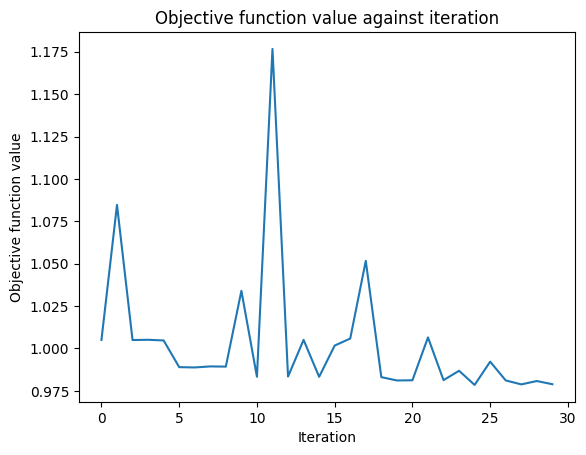

In [11]:
vqc_classifier.fit(X_train_chunk, y_train_chunk)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = vqc_classifier.predict(X_test_chunk)
print(confusion_matrix(y_test_chunk, y_pred))
print(classification_report(y_test_chunk, y_pred))

[[6389 3335]
 [3316 2488]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      9724
           1       0.43      0.43      0.43      5804

    accuracy                           0.57     15528
   macro avg       0.54      0.54      0.54     15528
weighted avg       0.57      0.57      0.57     15528



In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print ('Score Report of the imbalanced data(without hyperparameter pruning)\n')

# Calculate predictions for training set
y_train_pred = vqc_classifier.predict(X_train_chunk)

print ('Accuracy score: ')
print ('Training: %.2f' % accuracy_score(y_train_chunk, y_train_pred))
print ('Testing: %.2f \n' % accuracy_score(y_test_chunk, y_pred))

print ('Precision score: ')
print ('Training: %.2f' % precision_score(y_train_chunk, y_train_pred, average='macro', zero_division=1))
print ('Testing: %.2f \n' % precision_score(y_test_chunk, y_pred, average='macro', zero_division=1))

print ('Recall score: ')
print ('Training: %.2f' % recall_score(y_train_chunk, y_train_pred, average='macro', zero_division=1))
print ('Testing: %.2f \n' % recall_score(y_test_chunk, y_pred, average='macro', zero_division=1))

print ('F1 score: ')
print ('Training: %.2f' % f1_score(y_train_chunk, y_train_pred, average='macro', zero_division=1))
print ('Testing: %.2f' % f1_score(y_test_chunk, y_pred, average='macro', zero_division=1))

Score Report of the imbalanced data(without hyperparameter pruning)

Accuracy score: 
Training: 0.57
Testing: 0.57 

Precision score: 
Training: 0.54
Testing: 0.54 

Recall score: 
Training: 0.54
Testing: 0.54 

F1 score: 
Training: 0.54
Testing: 0.54


In [14]:
print("Train score", vqc_classifier.score(X_train_chunk, y_train_chunk))
print("Test score", vqc_classifier.score(X_test_chunk, y_test_chunk))

Train score 0.5727809671009053
Test score 0.5729005667181865


In [15]:
predict = vqc_classifier.predict(X_test_chunk)
y_predict = label_encoder.inverse_transform(y_test_chunk)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {y_predict}")

Predicted labels: [1 1 0 ... 0 0 0]
Ground truth:     [1 1 1 ... 1 0 0]


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming sampler_classifier and qnn are defined from previous cells
# sampler_classifier.save(qnn) # This line caused the error

# To save the model, provide a file path (e.g., 'sampler_classifier_model.pkl')
# You might need to install 'dill' if you haven't already: pip install dill
try:
    vqc_classifier.save('vqc_classifier_model.pkl')
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")

Model saved successfully!


In [17]:
loaded_model = NeuralNetworkClassifier.load('vqc_classifier_model.pkl')